In [2]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=pd.read_csv("HR_comma_sep.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


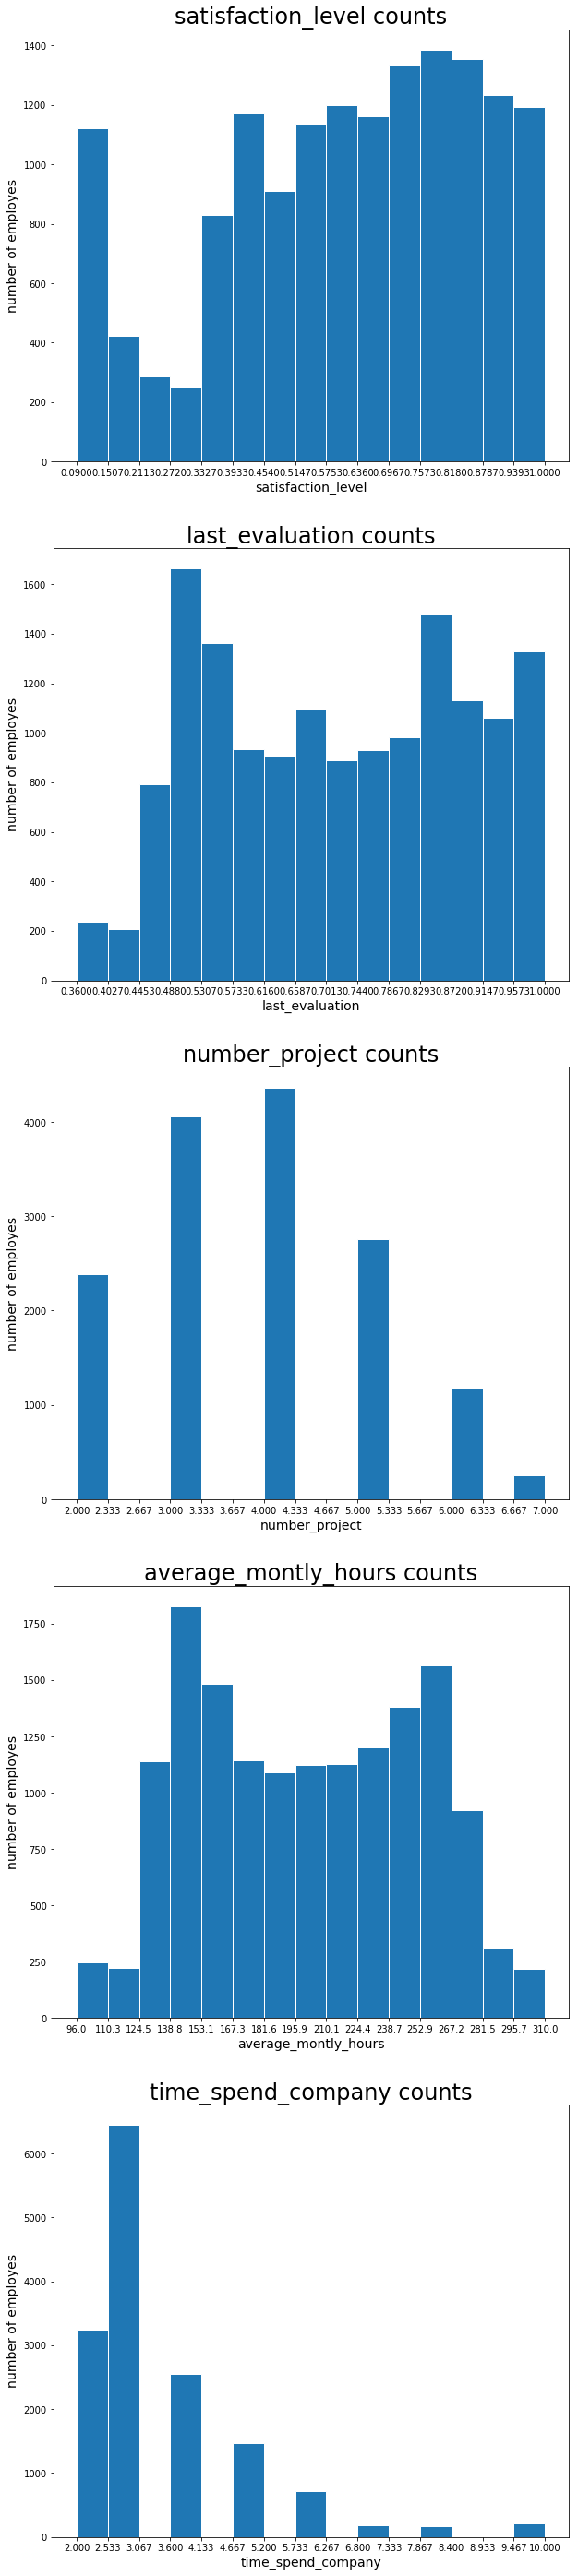

In [5]:
#istogrammi vari attributi numerici
fig, axes = plt.subplots(5, 1, figsize=(10,50))
#istograma satisfaction_level
max_sat_lev=max(df['satisfaction_level'])
min_sat_lev=min(df['satisfaction_level'])
delta=(max_sat_lev-min_sat_lev)/15

counts, bins, patches =axes[0].hist([df['satisfaction_level']],
             bins= 15,
             histtype='bar', 
             ec='white'
             )
axes[0].set_xticks(bins)
axes[0].set_title("satisfaction_level counts", fontsize=24)
axes[0].set_xlabel("satisfaction_level", fontsize=14)
axes[0].set_ylabel("number of employes", fontsize=14)


#istograma last_evaluation
counts, bins, patches =axes[1].hist([df['last_evaluation']],
             bins= 15,
             histtype='bar', 
             ec='white'
             )
axes[1].set_xticks(bins)
axes[1].set_title("last_evaluation counts", fontsize=24)
axes[1].set_xlabel("last_evaluation", fontsize=14)
axes[1].set_ylabel("number of employes", fontsize=14)

#istograma number_project
counts, bins, patches =axes[2].hist([df['number_project']],
             bins= 15,
             histtype='bar', 
             ec='white'
             )
axes[2].set_xticks(bins)
axes[2].set_title("number_project counts", fontsize=24)
axes[2].set_xlabel("number_project", fontsize=14)
axes[2].set_ylabel("number of employes", fontsize=14)

#istograma average_montly_hours
counts, bins, patches =axes[3].hist([df['average_montly_hours']],
             bins= 15,
             histtype='bar', 
             ec='white'
             )
axes[3].set_xticks(bins)
axes[3].set_title("average_montly_hours counts", fontsize=24)
axes[3].set_xlabel("average_montly_hours", fontsize=14)
axes[3].set_ylabel("number of employes", fontsize=14)

#istograma time_spend_company
counts, bins, patches =axes[4].hist([df['time_spend_company']],
             bins= 15,
             histtype='bar', 
             ec='white'
             )
axes[4].set_xticks(bins)
axes[4].set_title("time_spend_company counts", fontsize=24)
axes[4].set_xlabel("time_spend_company", fontsize=14)
axes[4].set_ylabel("number of employes", fontsize=14)





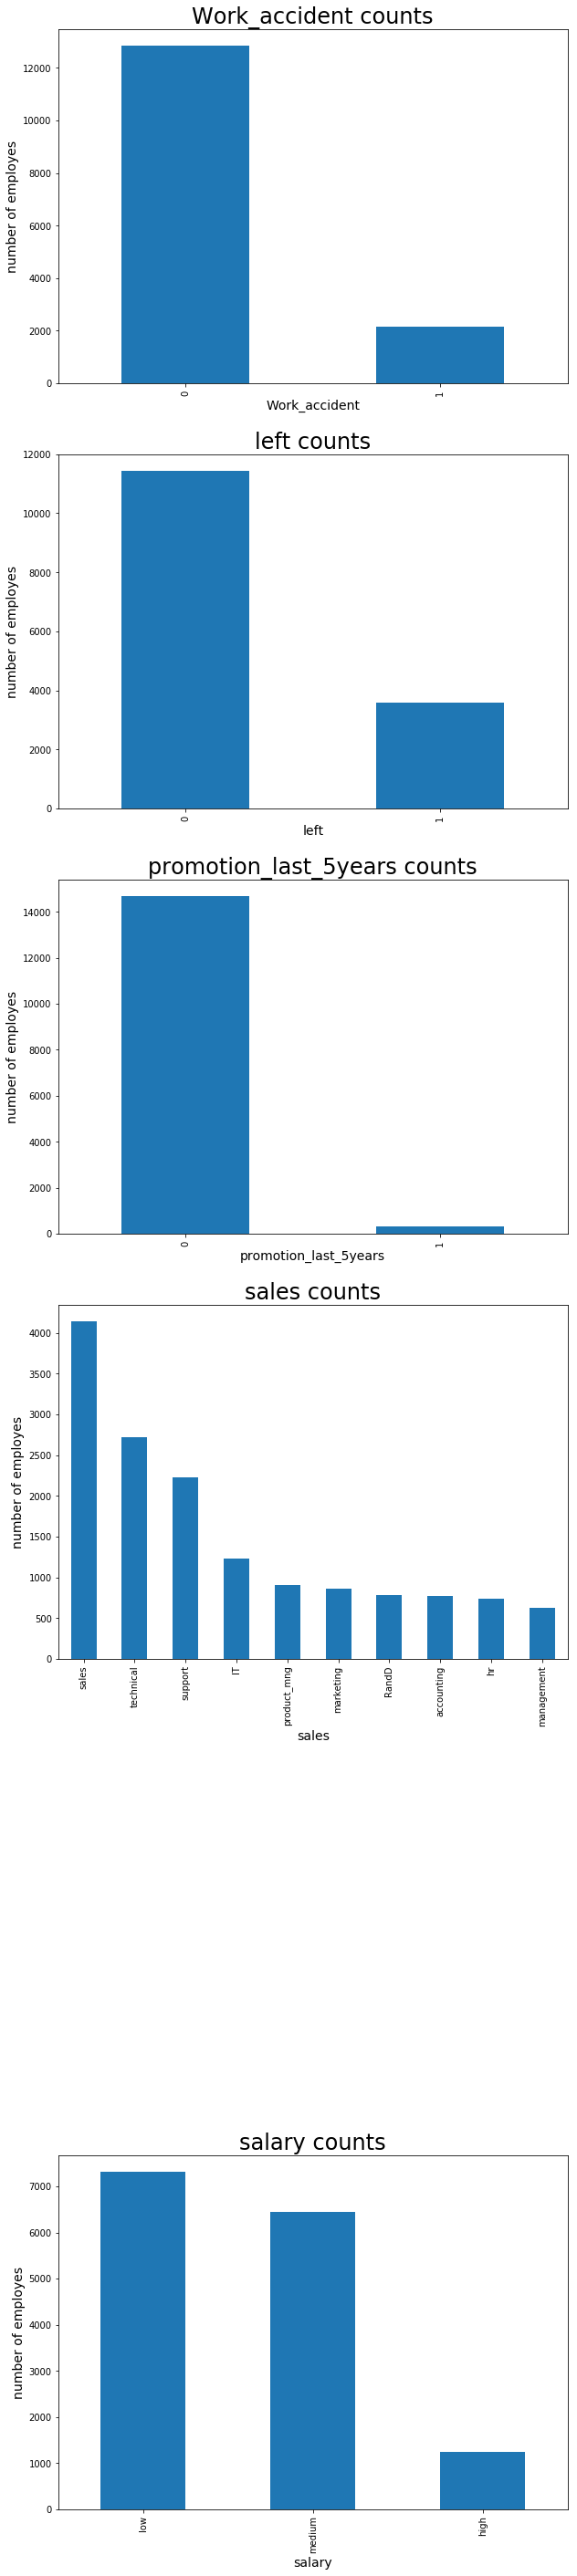

In [6]:
#bar-charts attributi categorici
fig=plt.figure(figsize=(10,50))
fig_dims=(6,1)

#bar-chart work_accident
plt.subplot2grid(fig_dims,(0,0))
df['Work_accident'].value_counts().plot(kind='bar')
plt.title("Work_accident counts", fontsize=24)
plt.xlabel("Work_accident", fontsize=14)
plt.ylabel("number of employes", fontsize=14)

#bar-chart left
plt.subplot2grid(fig_dims,(1,0))
df['left'].value_counts().plot(kind='bar')
plt.title("left counts", fontsize=24)
plt.xlabel("left", fontsize=14)
plt.ylabel("number of employes", fontsize=14)

#bar-chart promotion_last_5years 
plt.subplot2grid(fig_dims,(2,0))
df['promotion_last_5years'].value_counts().plot(kind='bar')
plt.title("promotion_last_5years counts", fontsize=24)
plt.xlabel("promotion_last_5years", fontsize=14)
plt.ylabel("number of employes", fontsize=14)

#bar-chart sales 
plt.subplot2grid(fig_dims,(3,0))
df['sales'].value_counts().plot(kind='bar')
plt.title("sales counts", fontsize=24)
plt.xlabel("sales", fontsize=14)
plt.ylabel("number of employes", fontsize=14)

#bar-chart salary
plt.subplot2grid(fig_dims,(5,0))
df['salary'].value_counts().plot(kind='bar')
plt.title("salary counts", fontsize=24)
plt.xlabel("salary", fontsize=14)
plt.ylabel("number of employes", fontsize=14)

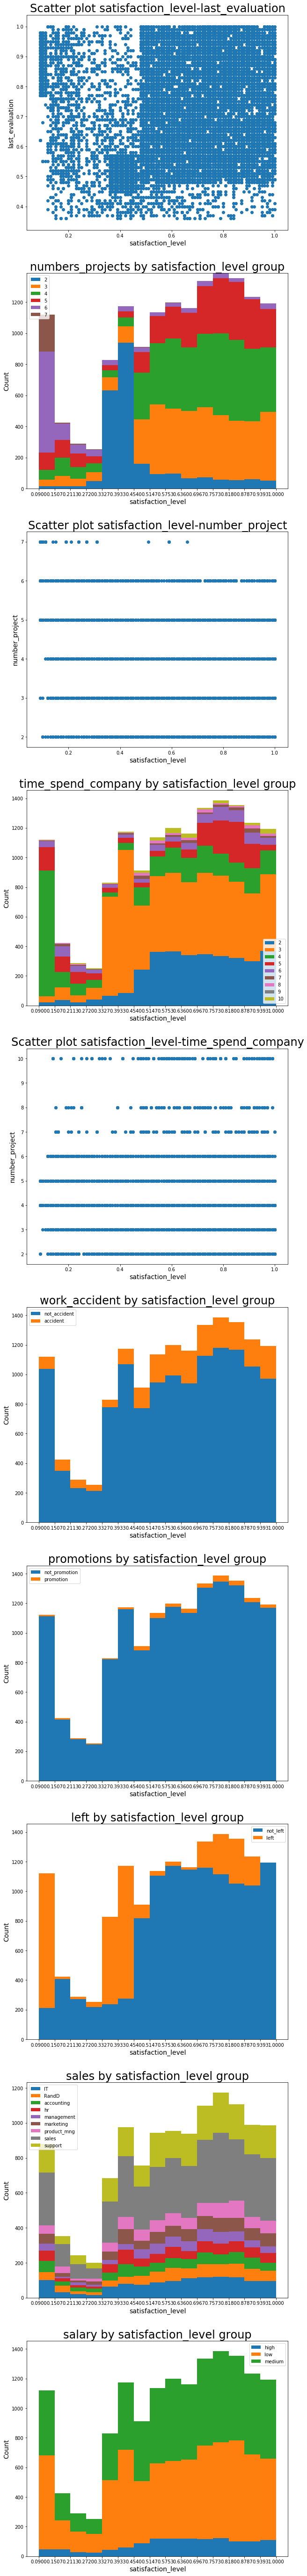

In [7]:
fig, axes = plt.subplots(10, 1, figsize=(10,100))
#scatter plot satisfaction_level - last_evaluation
axes[0].scatter(df['satisfaction_level'], df['last_evaluation'])
axes[0].set_title('Scatter plot satisfaction_level-last_evaluation', fontsize=24)
axes[0].set_xlabel('satisfaction_level', fontsize=14)
axes[0].set_ylabel('last_evaluation', fontsize=14)

#istogramma di satisfaction_level diviso per number_project
df1 = df[df['number_project'] == 2]['satisfaction_level']
df2 = df[df['number_project'] == 3]['satisfaction_level']
df3 = df[df['number_project'] == 4]['satisfaction_level']
df4 = df[df['number_project'] == 5]['satisfaction_level']
df5 = df[df['number_project'] == 6]['satisfaction_level']
df6 = df[df['number_project'] == 7]['satisfaction_level']
counts, bins, patches= axes[1].hist([df1,df2,df3,df4,df5,df6],
             bins=15,
             stacked=True
        
        )
axes[1].set_xticks(bins)
axes[1].legend(('2', '3', '4', '5', '6', '7'), loc='best')
axes[1].set_title('numbers_projects by satisfaction_level group', fontsize=24)
axes[1].set_xlabel('satisfaction_level', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

#scatter plot satisfaction_level - number_project
axes[2].scatter(df['satisfaction_level'], df['number_project'])
axes[2].set_title('Scatter plot satisfaction_level-number_project', fontsize=24)
axes[2].set_xlabel('satisfaction_level', fontsize=14)
axes[2].set_ylabel('number_project', fontsize=14)

#scatter plot satisfaction_level - average_montly_hours
df['average_montly_hours_norm']=df['average_montly_hours'].values.astype(float)

df['average_montly_hours_norm']=df['average_montly_hours'].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
df.head()

#istogramma di satisfaction_level diviso per time_spend_company
df1 = df[df['time_spend_company'] == 2]['satisfaction_level']
df2 = df[df['time_spend_company'] == 3]['satisfaction_level']
df3 = df[df['time_spend_company'] == 4]['satisfaction_level']
df4 = df[df['time_spend_company'] == 5]['satisfaction_level']
df5 = df[df['time_spend_company'] == 6]['satisfaction_level']
df6 = df[df['time_spend_company'] == 7]['satisfaction_level']
df7 = df[df['time_spend_company'] == 8]['satisfaction_level']
df8 = df[df['time_spend_company'] == 9]['satisfaction_level']
df9 = df[df['time_spend_company'] == 10]['satisfaction_level']

counts, bins, patches= axes[3].hist([df1,df2,df3,df4,df5,df6,df7,df8,df9],
             bins=15,
             stacked=True
        
        )
axes[3].set_xticks(bins)
axes[3].legend(('2', '3', '4', '5', '6', '7','8','9','10'), loc='best')
axes[3].set_title('time_spend_company by satisfaction_level group', fontsize=24)
axes[3].set_xlabel('satisfaction_level', fontsize=14)
axes[3].set_ylabel('Count', fontsize=14)

#scatter plot satisfaction_level - time_spend_company
axes[4].scatter(df['satisfaction_level'], df['time_spend_company'])
axes[4].set_title('Scatter plot satisfaction_level-time_spend_company', fontsize=24)
axes[4].set_xlabel('satisfaction_level', fontsize=14)
axes[4].set_ylabel('number_project', fontsize=14)

#istogramma di satisfaction_level diviso per Work_accident
df1 = df[df['Work_accident'] == 0]['satisfaction_level']
df2 = df[df['Work_accident'] == 1]['satisfaction_level']

counts, bins, patches= axes[5].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[5].set_xticks(bins)
axes[5].legend(('not_accident', 'accident'), loc='best')
axes[5].set_title('work_accident by satisfaction_level group', fontsize=24)
axes[5].set_xlabel('satisfaction_level', fontsize=14)
axes[5].set_ylabel('Count', fontsize=14)

#istogramma di satisfaction_level diviso per promotion_last_5years

df1 = df[df['promotion_last_5years'] == 0]['satisfaction_level']
df2 = df[df['promotion_last_5years'] == 1]['satisfaction_level']

counts, bins, patches= axes[6].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[6].set_xticks(bins)
axes[6].legend(('not_promotion', 'promotion'), loc='best')
axes[6].set_title('promotions by satisfaction_level group', fontsize=24)
axes[6].set_xlabel('satisfaction_level', fontsize=14)
axes[6].set_ylabel('Count', fontsize=14)

#istogramma di satisfaction_level diviso per left
df1 = df[df['left'] == 0]['satisfaction_level']
df2 = df[df['left'] == 1]['satisfaction_level']

counts, bins, patches= axes[7].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[7].set_xticks(bins)
axes[7].legend(('not_left', 'left'), loc='best')
axes[7].set_title('left by satisfaction_level group', fontsize=24)
axes[7].set_xlabel('satisfaction_level', fontsize=14)
axes[7].set_ylabel('Count', fontsize=14)

#istogramma di satisfaction_level diviso per sales
sales_int= sorted(df['sales'].unique())
sales_int_mapping = dict(zip(sales_int, range(0, len(sales_int) + 1)))
sales_int_mapping
df['sales_val'] = df['sales'].map(sales_int_mapping).astype(int)

df1 = df[df['sales_val'] == 0]['satisfaction_level']
df2 = df[df['sales_val'] == 1]['satisfaction_level']
df3 = df[df['sales_val'] == 2]['satisfaction_level']
df4 = df[df['sales_val'] == 3]['satisfaction_level']
df5 = df[df['sales_val'] == 4]['satisfaction_level']
df6 = df[df['sales_val'] == 5]['satisfaction_level']
df7 = df[df['sales_val'] == 6]['satisfaction_level']
df8 = df[df['sales_val'] == 7]['satisfaction_level']
df9 = df[df['sales_val'] == 8]['satisfaction_level']
df10 = df[df['sales_val'] == 9]['satisfaction_level']

counts, bins, patches= axes[8].hist([df1,df2,df3,df4,df5,df6,df7,df8,df9],
             bins=15,
             stacked=True
        
        )
axes[8].set_xticks(bins)
axes[8].legend(('IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'), loc='best')
axes[8].set_title('sales by satisfaction_level group', fontsize=24)
axes[8].set_xlabel('satisfaction_level', fontsize=14)
axes[8].set_ylabel('Count', fontsize=14)

#istogramma di satisfaction_level diviso per salary
salary_int= sorted(df['salary'].unique())
salary_int_mapping = dict(zip(salary_int, range(0, len(sales_int) + 1)))
salary_int_mapping
df['salary_val'] = df['salary'].map(salary_int_mapping).astype(int)

df1 = df[df['salary_val'] == 0]['satisfaction_level']
df2 = df[df['salary_val'] == 1]['satisfaction_level']
df3 = df[df['salary_val'] == 2]['satisfaction_level']

counts, bins, patches= axes[9].hist([df1,df2,df3],
             bins=15,
             stacked=True
        
        )
axes[9].set_xticks(bins)
axes[9].legend(('high', 'low', 'medium'), loc='best')
axes[9].set_title('salary by satisfaction_level group', fontsize=24)
axes[9].set_xlabel('satisfaction_level', fontsize=14)
axes[9].set_ylabel('Count', fontsize=14)

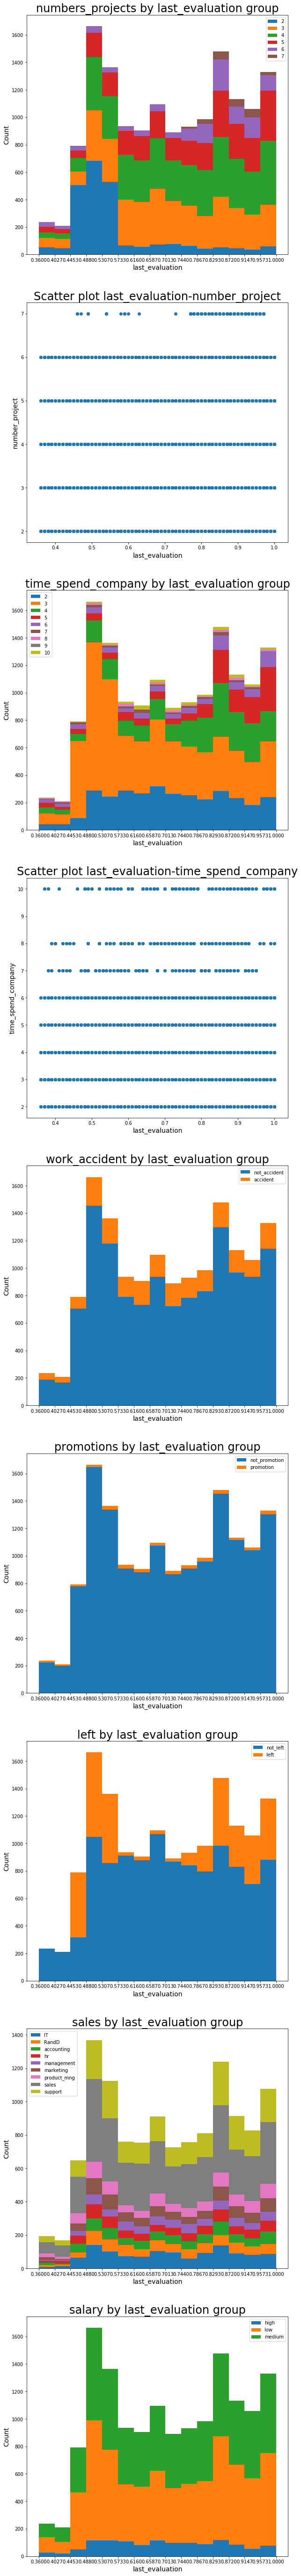

In [16]:
fig, axes = plt.subplots(9, 1, figsize=(10,100))
#istogramma di last_evaluation diviso per number_project
df1 = df[df['number_project'] == 2]['last_evaluation']
df2 = df[df['number_project'] == 3]['last_evaluation']
df3 = df[df['number_project'] == 4]['last_evaluation']
df4 = df[df['number_project'] == 5]['last_evaluation']
df5 = df[df['number_project'] == 6]['last_evaluation']
df6 = df[df['number_project'] == 7]['last_evaluation']
counts, bins, patches= axes[0].hist([df1,df2,df3,df4,df5,df6],
             bins=15,
             stacked=True
        
        )
axes[0].set_xticks(bins)
axes[0].legend(('2', '3', '4', '5', '6', '7'), loc='best')
axes[0].set_title('numbers_projects by last_evaluation group', fontsize=24)
axes[0].set_xlabel('last_evaluation', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

#scatter plot last_evaluation - number_project
axes[1].scatter(df['last_evaluation'], df['number_project'])
axes[1].set_title('Scatter plot last_evaluation-number_project', fontsize=24)
axes[1].set_xlabel('last_evaluation', fontsize=14)
axes[1].set_ylabel('number_project', fontsize=14)


#istogramma last_evaluation diviso per time_spend_company
df1 = df[df['time_spend_company'] == 2]['last_evaluation']
df2 = df[df['time_spend_company'] == 3]['last_evaluation']
df3 = df[df['time_spend_company'] == 4]['last_evaluation']
df4 = df[df['time_spend_company'] == 5]['last_evaluation']
df5 = df[df['time_spend_company'] == 6]['last_evaluation']
df6 = df[df['time_spend_company'] == 7]['last_evaluation']
df7 = df[df['time_spend_company'] == 8]['last_evaluation']
df8 = df[df['time_spend_company'] == 9]['last_evaluation']
df9 = df[df['time_spend_company'] == 10]['last_evaluation']

counts, bins, patches= axes[2].hist([df1,df2,df3,df4,df5,df6,df7,df8,df9],
             bins=15,
             stacked=True
        
        )
axes[2].set_xticks(bins)
axes[2].legend(('2', '3', '4', '5', '6', '7','8','9','10'), loc='best')
axes[2].set_title('time_spend_company by last_evaluation group', fontsize=24)
axes[2].set_xlabel('last_evaluation', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)

#scatter plot last_evaluation - time_spend_company
axes[3].scatter(df['last_evaluation'], df['time_spend_company'])
axes[3].set_title('Scatter plot last_evaluation-time_spend_company', fontsize=24)
axes[3].set_xlabel('last_evaluation', fontsize=14)
axes[3].set_ylabel('time_spend_company', fontsize=14)

#istogramma di last_evaluation diviso per Work_accident
df1 = df[df['Work_accident'] == 0]['last_evaluation']
df2 = df[df['Work_accident'] == 1]['last_evaluation']

counts, bins, patches= axes[4].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[4].set_xticks(bins)
axes[4].legend(('not_accident', 'accident'), loc='best')
axes[4].set_title('work_accident by last_evaluation group', fontsize=24)
axes[4].set_xlabel('last_evaluation', fontsize=14)
axes[4].set_ylabel('Count', fontsize=14)

#istogramma di last_evaluation diviso per promotion_last_5years

df1 = df[df['promotion_last_5years'] == 0]['last_evaluation']
df2 = df[df['promotion_last_5years'] == 1]['last_evaluation']

counts, bins, patches= axes[5].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[5].set_xticks(bins)
axes[5].legend(('not_promotion', 'promotion'), loc='best')
axes[5].set_title('promotions by last_evaluation group', fontsize=24)
axes[5].set_xlabel('last_evaluation', fontsize=14)
axes[5].set_ylabel('Count', fontsize=14)

#istogramma di last_evaluation diviso per left
df1 = df[df['left'] == 0]['last_evaluation']
df2 = df[df['left'] == 1]['last_evaluation']

counts, bins, patches= axes[6].hist([df1,df2],
             bins=15,
             stacked=True
        
        )
axes[6].set_xticks(bins)
axes[6].legend(('not_left', 'left'), loc='best')
axes[6].set_title('left by last_evaluation group', fontsize=24)
axes[6].set_xlabel('last_evaluation', fontsize=14)
axes[6].set_ylabel('Count', fontsize=14)

#istogramma di last_evaluation diviso per sales
sales_int= sorted(df['sales'].unique())
sales_int_mapping = dict(zip(sales_int, range(0, len(sales_int) + 1)))
sales_int_mapping
df['sales_val'] = df['sales'].map(sales_int_mapping).astype(int)

df1 = df[df['sales_val'] == 0]['last_evaluation']
df2 = df[df['sales_val'] == 1]['last_evaluation']
df3 = df[df['sales_val'] == 2]['last_evaluation']
df4 = df[df['sales_val'] == 3]['last_evaluation']
df5 = df[df['sales_val'] == 4]['last_evaluation']
df6 = df[df['sales_val'] == 5]['last_evaluation']
df7 = df[df['sales_val'] == 6]['last_evaluation']
df8 = df[df['sales_val'] == 7]['last_evaluation']
df9 = df[df['sales_val'] == 8]['last_evaluation']
df10 = df[df['sales_val'] == 9]['last_evaluation']

counts, bins, patches= axes[7].hist([df1,df2,df3,df4,df5,df6,df7,df8,df9],
             bins=15,
             stacked=True
        
        )
axes[7].set_xticks(bins)
axes[7].legend(('IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'), loc='best')
axes[7].set_title('sales by last_evaluation group', fontsize=24)
axes[7].set_xlabel('last_evaluation', fontsize=14)
axes[7].set_ylabel('Count', fontsize=14)

#istogramma di last_evaluation diviso per salary
salary_int= sorted(df['salary'].unique())
salary_int_mapping = dict(zip(salary_int, range(0, len(sales_int) + 1)))
salary_int_mapping
df['salary_val'] = df['salary'].map(salary_int_mapping).astype(int)

df1 = df[df['salary_val'] == 0]['last_evaluation']
df2 = df[df['salary_val'] == 1]['last_evaluation']
df3 = df[df['salary_val'] == 2]['last_evaluation']

counts, bins, patches= axes[8].hist([df1,df2,df3],
             bins=15,
             stacked=True
        
        )
axes[8].set_xticks(bins)
axes[8].legend(('high', 'low', 'medium'), loc='best')
axes[8].set_title('salary by last_evaluation group', fontsize=24)
axes[8].set_xlabel('last_evaluation', fontsize=14)
axes[8].set_ylabel('Count', fontsize=14)

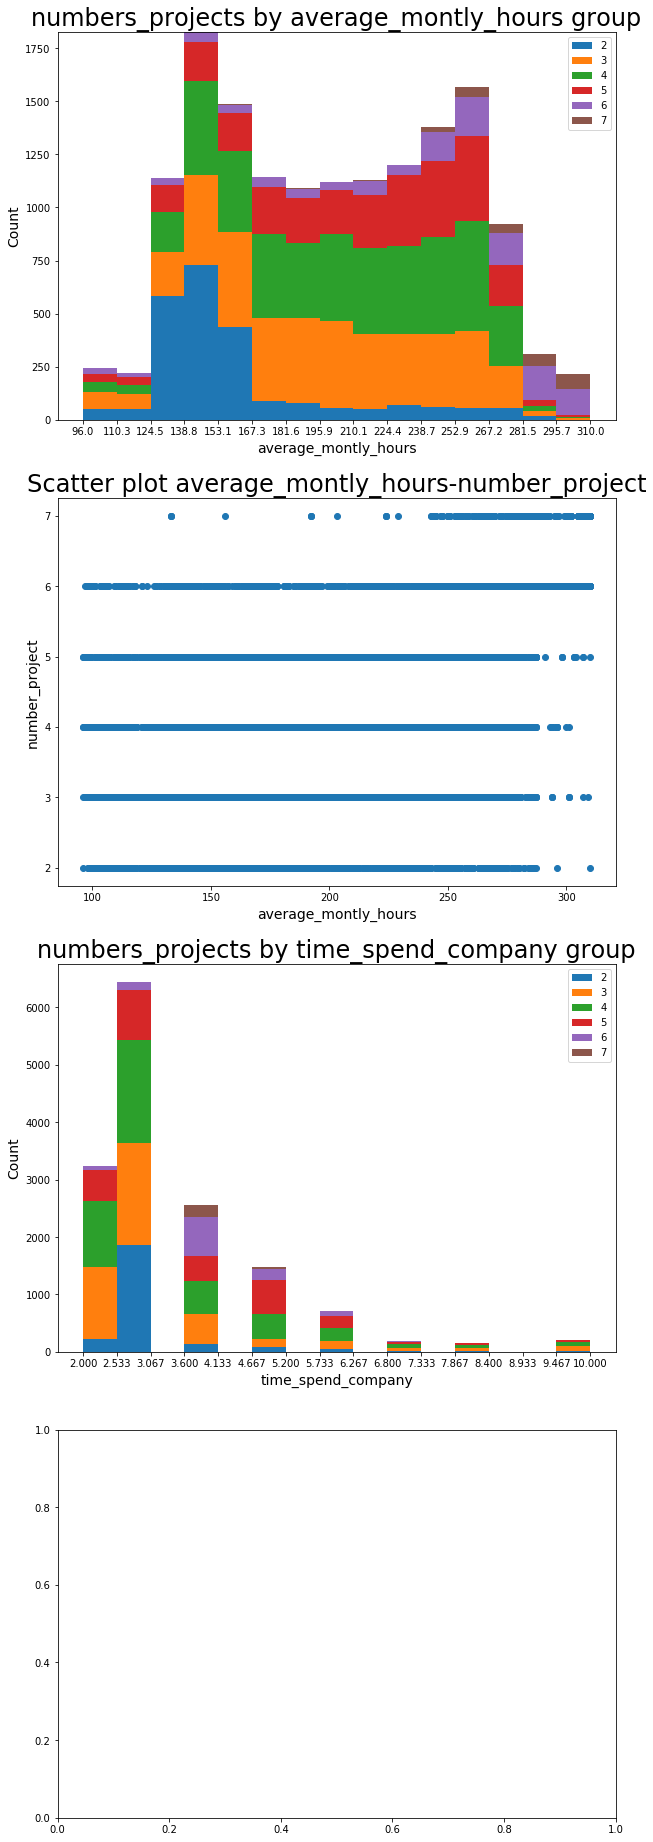

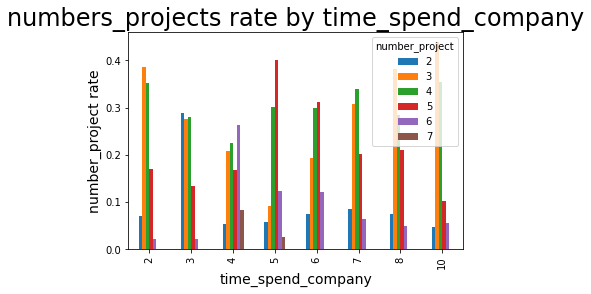

In [23]:
fig=plt.figure(figsize=(10,50))
fig_dims=(6,1)
#istogramma di average_montly_hours diviso per number_project
plt.subplot2grid(fig_dims,(0,0))
df1 = df[df['number_project'] == 2]['average_montly_hours']
df2 = df[df['number_project'] == 3]['average_montly_hours']
df3 = df[df['number_project'] == 4]['average_montly_hours']
df4 = df[df['number_project'] == 5]['average_montly_hours']
df5 = df[df['number_project'] == 6]['average_montly_hours']
df6 = df[df['number_project'] == 7]['average_montly_hours']
counts, bins, patches= plt.hist([df1,df2,df3,df4,df5,df6],
             bins=15,
             stacked=True
        
        )
plt.xticks(bins)
plt.legend(('2', '3', '4', '5', '6', '7'), loc='best')
plt.title('numbers_projects by average_montly_hours group', fontsize=24)
plt.xlabel('average_montly_hours', fontsize=14)
plt.ylabel('Count', fontsize=14)

#scatter plot average_montly_hours - number_project
plt.subplot2grid(fig_dims,(1,0))
plt.scatter(df['average_montly_hours'], df['number_project'])
plt.title('Scatter plot average_montly_hours-number_project', fontsize=24)
plt.xlabel('average_montly_hours', fontsize=14)
plt.ylabel('number_project', fontsize=14)

#istogramma di time_spend_company diviso per number_project
plt.subplot2grid(fig_dims,(2,0))
df1 = df[df['number_project'] == 2]['time_spend_company']
df2 = df[df['number_project'] == 3]['time_spend_company']
df3 = df[df['number_project'] == 4]['time_spend_company']
df4 = df[df['number_project'] == 5]['time_spend_company']
df5 = df[df['number_project'] == 6]['time_spend_company']
df6 = df[df['number_project'] == 7]['time_spend_company']
counts, bins, patches= plt.hist([df1,df2,df3,df4,df5,df6],
             bins=15,
             stacked=True
        
        )
plt.xticks(bins)
plt.legend(('2', '3', '4', '5', '6', '7'), loc='best')
plt.title('numbers_projects by time_spend_company group', fontsize=24)
plt.xlabel('time_spend_company', fontsize=14)
plt.ylabel('Count', fontsize=14)

#bar-chart number_project rate by time_spend_company
plt.subplot2grid(fig_dims,(3,0))
time_company_xt = pd.crosstab(df['time_spend_company'], df['number_project'])
time_company_xt_pct = time_company_xt.div(time_company_xt.sum(1).astype(float), axis=0)
time_company_xt_pct.plot(kind='bar', stacked=False)
plt.title('numbers_projects rate by time_spend_company', fontsize=24)
plt.xlabel('time_spend_company', fontsize=14)
plt.ylabel('number_project rate', fontsize=14)
#bar-chart number_project by Work_accident
#work_accident_xt = pd.crosstab(df['Work_accident'], df['number_project'])
#sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
#sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')